<a href="https://colab.research.google.com/github/Patricia-1996/ALEST2_MarceloCohen/blob/main/analisecomplexidade_exp_poli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de complexidade de funções genéricas - Contando operações

Prof. Marcelo Cohen - Baseado e adaptado do [material](https://www.inf.pucrs.br/~oliveira/alestII/funcs.pdf) do prof. João Batista Oliveira

De forma geral, nos preocupamos com duas situações: funções exponenciais e funções polinomiais.

## Funções Exponenciais

Começamos olhando uma função bem conhecida (sequência de Fibonacci):

In [ ]:
def func1(n):
    global op  # acessa a variável op definida no programa principal
    op += 1    # cada chamada conta UMA operação
    if n <= 1:
        return 1
    return func1(n-1) + func1(n-2)

In [ ]:
for n in range(1,40): # conta de 1 a 39 - não dá para fazer muito mais que isso... demora demais!
    op = 0
    func1(n)
    print(n,op) # gera uma tabela com o n e a quantidade de operações correspondente

1 1
2 3
3 5
4 9
5 15
6 25
7 41
8 67
9 109
10 177
11 287
12 465
13 753
14 1219
15 1973
16 3193
17 5167
18 8361
19 13529
20 21891
21 35421
22 57313
23 92735
24 150049
25 242785
26 392835
27 635621
28 1028457
29 1664079
30 2692537
31 4356617
32 7049155
33 11405773
34 18454929
35 29860703
36 48315633
37 78176337
38 126491971
39 204668309


### Plotando

A ideia de plotar esse resultado é tentar "enxergar", em linhas gerais, qual é o comportamento de crescimento dessa função. Isso **não** vai resolver o nosso problema, mas vai nos mostrar, por exemplo, que a função não é linear ou logarítmica (que têm gráficos com comportamento bem conhecido).

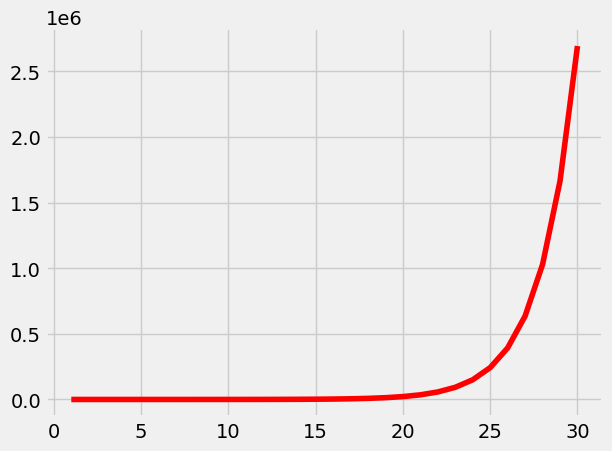

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
[1, 3, 5, 9, 15, 25, 41, 67, 109, 177, 287, 465, 753, 1219, 1973, 3193, 5167, 8361, 13529, 21891, 35421, 57313, 92735, 150049, 242785, 392835, 635621, 1028457, 1664079, 2692537]


In [ ]:
import matplotlib.pyplot as plt
x = []
y = []
for n in range(1,31):
    op = 0
    func1(n)
    x.append(n)
    y.append(op)
plt.style.use('fivethirtyeight')
plt.plot(x,y,'r-')
plt.show()
print(x)
print(y)

Olhando para o gráfico não é possível ter certeza de nada... **Parece** que a função cresce de forma bem rápida, então podemos imaginar que realmente é exponencial. Mas para ter certeza, podemos usar uma técnica bastante simples: basta aplicar uma escala logarítmica em Y:

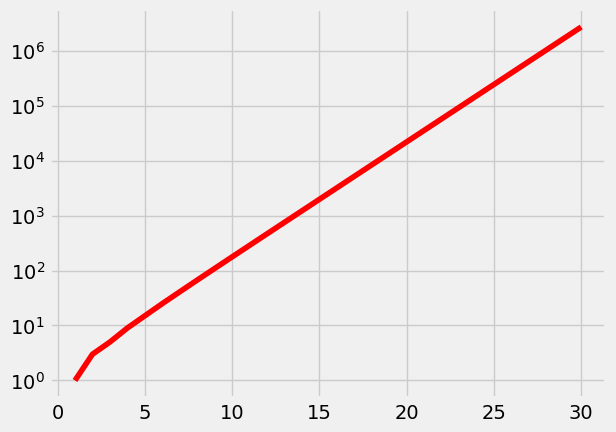

In [ ]:
plt.yscale("log")
plt.plot(x,y,'r-')
plt.show()

Se a função for **realmente** exponencial, no momento em que for plotada com escala logarítmica no seu resultado, isto é, quando plotamos $\log(f(x))$ ao invés de $f(x)$, a aparência será de uma **reta**.

A partir daí, podemos usar algumas transformações que vêm da Matemática para fazer a análise:

$f(n) = a \cdot b^{n}$

Como queremos nos livrar da exponencial $(b^{n})$, uma técnica bastante empregada é aplicar um logaritmo de ambos os lados da equação. Com isso teremos:

$\log({f(n)}) = \log{(a\cdot b^{n})}$

Aplicando as propriedades da multiplicação de logaritmos e da exponenciação de logaritmos:

$\log({f(n)}) = \log{(a\cdot b^{n})} = \log{(a)} + \log{(b^{n})}$

$\log({f(n)}) = n \cdot \log{(b)} + \log{(a)}$

A equação agora representa uma **reta** (aquela que vimos no gráfico com escala logarítmica). Portanto, ela tem a forma $r + s$, onde:

$r = n \cdot \log{(b)}$

$s = \log{(a)}$

### Como encontrar a inclinação da reta (r)?

Para descobrirmos a base da função exponencial $(b)$, precisamos primeiro descobrir a inclinação da reta. Isso é relativamente simples:
- Primeiro calculamos dois valores conhecidos da função:

$f(2) = 3$

$f(30) = 2692537$

- Como o gráfico foi gerado com escala logarítmica em y, fazemos:

$r \approx \frac{\log{(2692537)}-\log{(3)}}{30-2} = 0.489549...$

- Logo:

$b = e^{r} \approx 1.6315808$

In [ ]:
print(1.6315808 ** 30)
print(1.6315808 ** 50)
print(1.6315808 ** 100)

2389227.9160959595
42700140180.72691
1.823301971453729e+21


## Funções Polinomiais

O segundo caso que nos interessa (e provavelmente ocorrerá na maior parte dos algoritmos) é se a função for polinomial. Nesse caso, é importante determinar o grau do polinômio $(n^{b})$.

Novamente, começamos com um exemplo simples. Neste caso, o próprio valor de retorno da função corresponde à quantidade de iterações realizadas $(r)$.

In [ ]:
def func2(n):
    r = 0
    for i in range(n+1):  # 0...n
        for j in range(i+2, 2*n+1):  # i+2 ... 2n
            r += 1
    return r

In [ ]:
for n in range (0,501):
    print(n,func2(n))

0 0
1 1
2 6
3 14
4 25
5 39
6 56
7 76
8 99
9 125
10 154
11 186
12 221
13 259
14 300
15 344
16 391
17 441
18 494
19 550
20 609
21 671
22 736
23 804
24 875
25 949
26 1026
27 1106
28 1189
29 1275
30 1364
31 1456
32 1551
33 1649
34 1750
35 1854
36 1961
37 2071
38 2184
39 2300
40 2419
41 2541
42 2666
43 2794
44 2925
45 3059
46 3196
47 3336
48 3479
49 3625
50 3774
51 3926
52 4081
53 4239
54 4400
55 4564
56 4731
57 4901
58 5074
59 5250
60 5429
61 5611
62 5796
63 5984
64 6175
65 6369
66 6566
67 6766
68 6969
69 7175
70 7384
71 7596
72 7811
73 8029
74 8250
75 8474
76 8701
77 8931
78 9164
79 9400
80 9639
81 9881
82 10126
83 10374
84 10625
85 10879
86 11136
87 11396
88 11659
89 11925
90 12194
91 12466
92 12741
93 13019
94 13300
95 13584
96 13871
97 14161
98 14454
99 14750
100 15049
101 15351
102 15656
103 15964
104 16275
105 16589
106 16906
107 17226
108 17549
109 17875
110 18204
111 18536
112 18871
113 19209
114 19550
115 19894
116 20241
117 20591
118 20944
119 21300
120 21659
121 22021
122 22386


### Plotando

A estratégia é a mesma de antes: vamos plotar n e o total de operações correpondente para tentar "enxergar" algo:

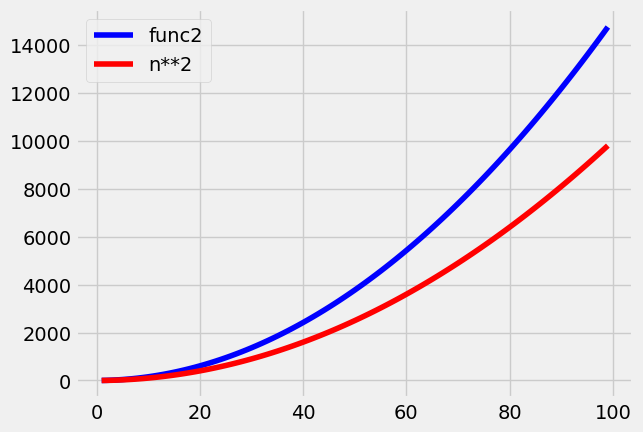

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[1, 6, 14, 25, 39, 56, 76, 99, 125, 154, 186, 221, 259, 300, 344, 391, 441, 494, 550, 609, 671, 736, 804, 875, 949, 1026, 1106, 1189, 1275, 1364, 1456, 1551, 1649, 1750, 1854, 1961, 2071, 2184, 2300, 2419, 2541, 2666, 2794, 2925, 3059, 3196, 3336, 3479, 3625, 3774, 3926, 4081, 4239, 4400, 4564, 4731, 4901, 5074, 5250, 5429, 5611, 5796, 5984, 6175, 6369, 6566, 6766, 6969, 7175, 7384, 7596, 7811, 8029, 8250, 8474, 8701, 8931, 9164, 9400, 9639, 9881, 10126, 10374, 10625, 10879, 11136, 11396, 11659, 11925, 12194, 12466, 12741, 13019, 13300, 13584, 13871, 14161, 14454, 14750]


In [ ]:
x2 = []
y2 = []
y3 = []
for n in range(1,100):
    x2.append(n)
    y2.append(func2(n))
    y3.append(n**2)
plt.plot(x2,y2,'b-',label="func2")
plt.plot(x2,y3,'r-',label="n**2")
plt.legend()
plt.show()
print(x2)
print(y2)

Se repetirmos o processo e usarmos uma escala logarítmica em Y, veremos que dessa vez o resultado não é uma linha reta, logo não é exponencial:

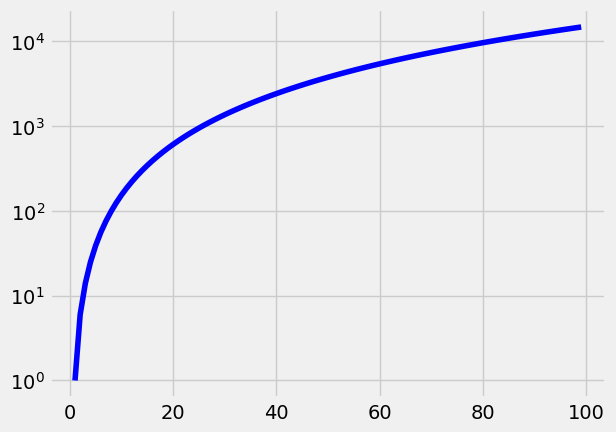

In [ ]:
plt.yscale("log")
plt.plot(x2,y2,'b-')
plt.show()

Nesse caso, a técnica é igualmente simples: vamos agora exibir **ambos** os eixos com escala logarítmica.

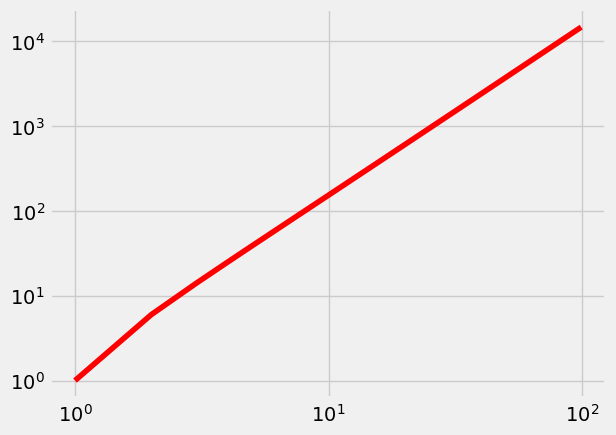

In [ ]:
plt.xscale("log")
plt.yscale("log")
plt.plot(x2,y2,'r-')
plt.show()

Se agora o resultado for uma **reta** (e nesse caso, é), significa que a função é **polinomial**.

Tentaremos resolver de forma bem parecida:

$f(n) = n^{b}$

- Aplicando logaritmo nos dois lados...

$\log(f(n)) = \log(n^{b}) = b\cdot \log(n)$

- ou usando $f(e^{n})$ ao invés de $f(n)$. A vantagem de fazer isso é que conseguimos eliminar os logaritmos no lado direito:

$\log(f(e^{n})) = \log((e^{n})^{b}) = b\cdot log(e^{n}) = n\cdot b \cdot \log(e) = n \cdot b \cdot 1$

- Logo, b é o coeficiente angular dessa reta. Repetindo o processo anterior, calculamos primeiro o valor da função em dois pontos conhecidos:

$f(1) = 1$

$f(100) = 15049$

- Mas como estamos usando escala logarítmica em **ambos** os eixos, fazemos o cálculo de $b$ usando $\log$ no numerador e denominador:

$b \approx \frac{\log(15049) - \log(1)}{\log(100)-\log(1)} = 2.08875...$

$f(n) \approx n^{2.09}$

Obs: o expoente é, efetivamente, igual a 2 (função quadrática), mas para fins experimentais esse resultado já é bem aceitável.

In [ ]:
print(100000 ** 2.08875)
print(100000 ** 2)

27781135966.42539
10000000000
